In [1]:
import numpy as np
import os
from pathlib import Path
import tarfile
import matplotlib.pyplot as plt

from nilearn import plotting, image, datasets
from nilearn.maskers import NiftiSpheresMasker
from nilearn.connectome import ConnectivityMeasure
import nibabel as nib

from sklearn.covariance import GraphicalLassoCV

### Loading in the Dataset

In [2]:
data = np.loadtxt('HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d100_ts2/100206.txt')
data.shape

# for one subject, there are 4800 timepoints of the signal info in 100 brain regions/nodes 

(4800, 100)

In [3]:
data[0].shape

(100,)

### Visualize Brain Signals of the Entire Brain for Each Time Point (Across All Individuals)

(4800,)


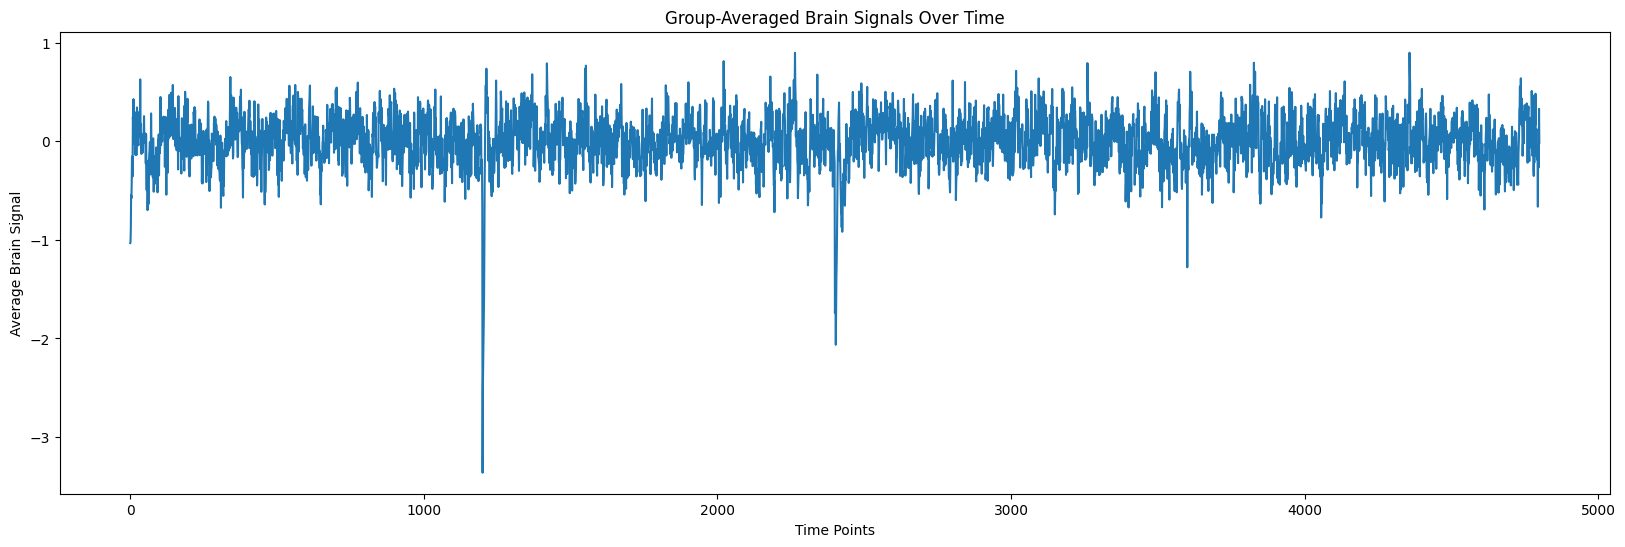

In [4]:
folder = 'HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d100_ts2'

# Get a list of fMRI data for all 1003 subjects
file_paths = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.txt')]

# Calculate the average brain signal for all 1003 subjects at each time point
all_subjects_data = []
for file_path in file_paths:
    data = np.loadtxt(file_path)  
    avg_across_regions = np.mean(data, axis=1)  # Average across 100 regions, shape == (4800,)
    all_subjects_data.append(avg_across_regions)

## print(len(all_subjects_data))

# Calculate average brain signal across individuals at each time point
group_avg_across_individuals = np.mean(np.vstack(all_subjects_data), axis=0)
print(group_avg_across_individuals.shape)

# Visualize the group-averaged brain activity over time
plt.figure(figsize=(20,6))
plt.plot(group_avg_across_individuals)
plt.xlabel('Time Points')
plt.ylabel('Average Brain Signal')
plt.title('Group-Averaged Brain Signals Over Time')
plt.show()

### Plot Pairwise Functional Connectivity Correlation Matrix

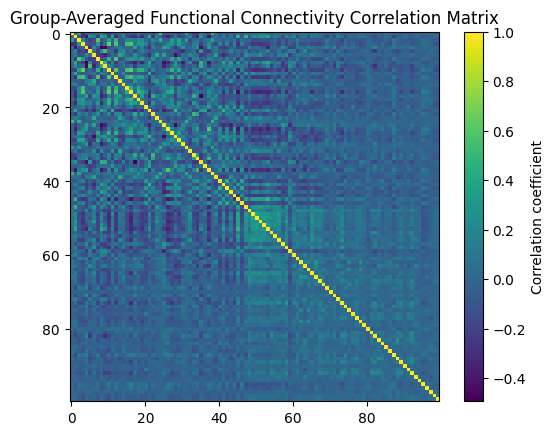

In [5]:
correlation_matrices = []
# get a pairwise correlation matrix for each individual's brain regions
for file_path in file_paths:
    data = np.loadtxt(file_path) 
    corr_matrix = np.corrcoef(data.T)  # correlation between each pair of brain regions
    correlation_matrices.append(corr_matrix)

# get the average across individuals to see average correlation
group_avg_correlation_matrix = np.mean(np.stack(correlation_matrices), axis=0)

# visualize the group-averaged correlation matrix
plt.imshow(group_avg_correlation_matrix, cmap='viridis')
plt.colorbar(label='Correlation coefficient')
plt.title('Group-Averaged Functional Connectivity Correlation Matrix')
plt.show()

### visualize pairs of brain regions for the most dynamic regions across all individuals

TBD

---

Tutorial: https://nilearn.github.io/stable/auto_examples/03_connectivity/plot_sphere_based_connectome.html#extract-signals-on-spheres-from-an-atlas



In [6]:
path_file = 'HCP_PTN1200/groupICA_3T_HCP1200_MSMAll.tar.gz'
extract_dir = 'data'
with tarfile.open(path_file, 'r:gz') as tar:
    tar.extractall(path = extract_dir)
    

In [7]:
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        print(f'Found file: {file}')

Found file: melodic_IC.dscalar.nii
Found file: melodic_IC_sum.nii.gz
Found file: melodic_IC_ftb.dlabel.nii
Found file: 0048.png
Found file: 0049.png
Found file: 0006.png
Found file: 0012.png
Found file: 0013.png
Found file: 0007.png
Found file: 0011.png
Found file: 0005.png
Found file: 0039.png
Found file: 0038.png
Found file: 0004.png
Found file: 0010.png
Found file: 0028.png
Found file: 0014.png
Found file: 0000.png
Found file: 0001.png
Found file: 0015.png
Found file: 0029.png
Found file: 0003.png
Found file: 0017.png
Found file: 0016.png
Found file: 0002.png
Found file: 0027.png
Found file: 0033.png
Found file: 0032.png
Found file: 0026.png
Found file: 0030.png
Found file: 0024.png
Found file: 0018.png
Found file: 0019.png
Found file: 0025.png
Found file: 0031.png
Found file: 0009.png
Found file: 0035.png
Found file: 0021.png
Found file: 0020.png
Found file: 0034.png
Found file: 0008.png
Found file: 0022.png
Found file: 0036.png
Found file: 0037.png
Found file: 0023.png
Found file:

In [8]:
nii_file = Path(extract_dir) / 'groupICA/groupICA_3T_HCP1200_MSMAll_d15.ica/melodic_IC_sum.nii.gz'
nii_file

PosixPath('data/groupICA/groupICA_3T_HCP1200_MSMAll_d15.ica/melodic_IC_sum.nii.gz')

In [9]:
img = nib.load(nii_file)
data = img.get_fdata()

In [10]:
data.shape

(91, 109, 91, 15)

##### Visualize the Brain for Each Timeseries

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


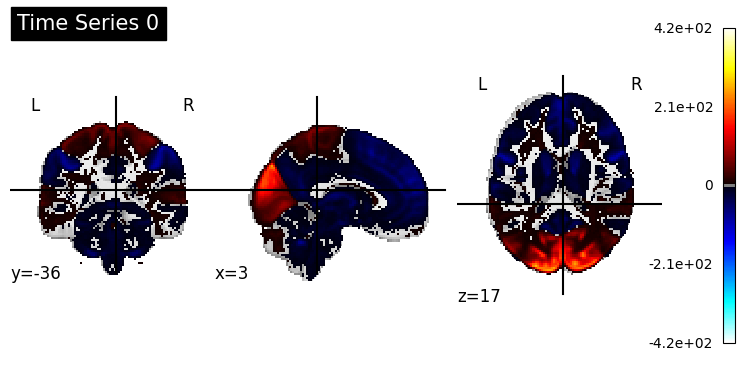

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


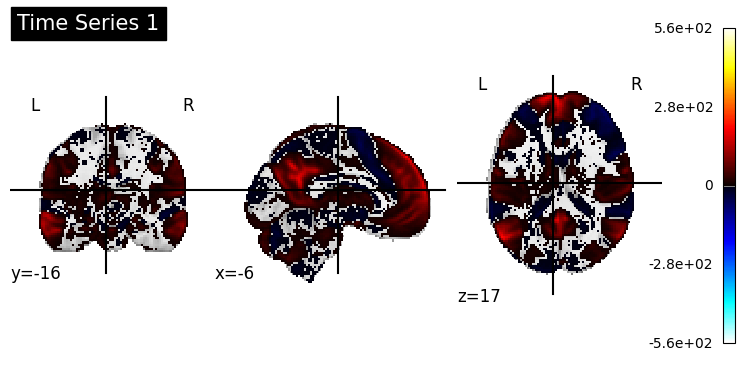

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


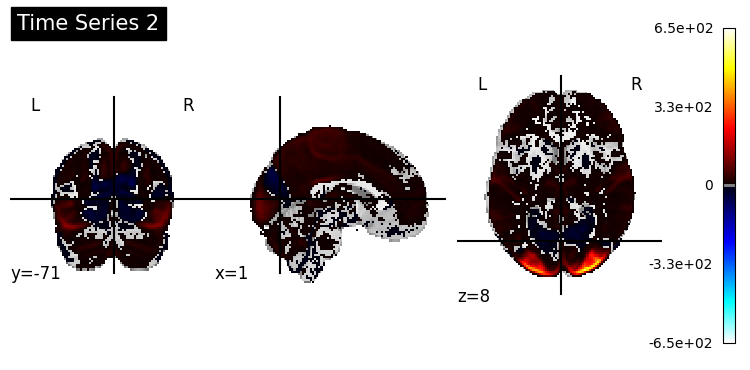

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


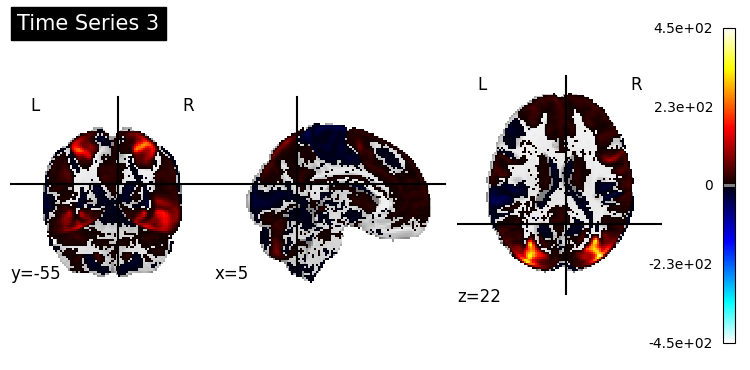

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


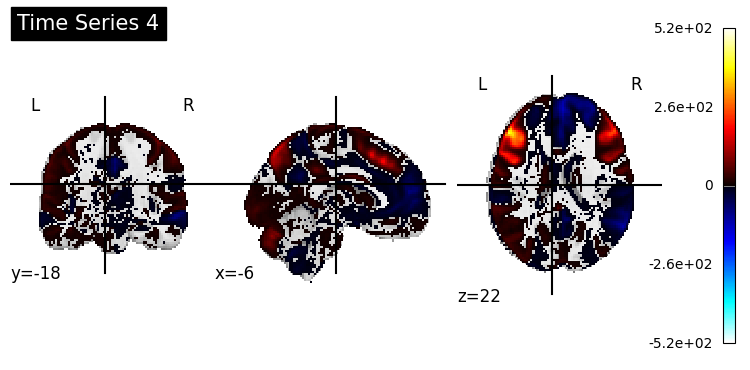

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


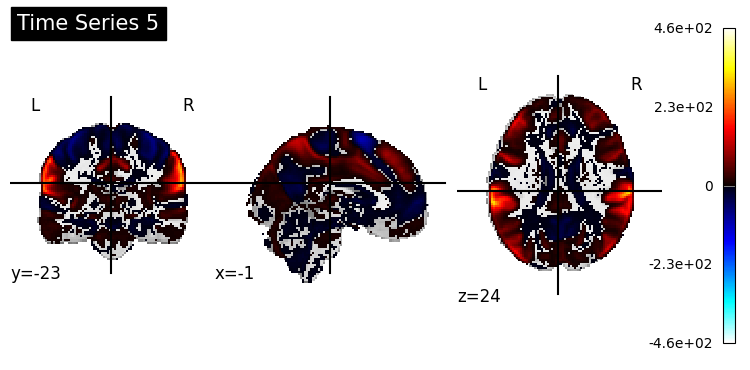

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


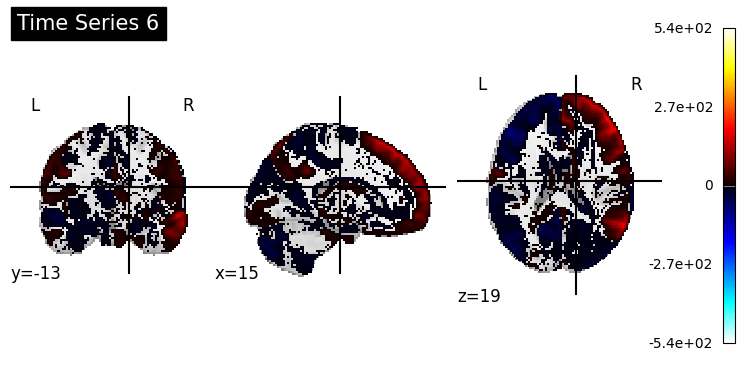

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


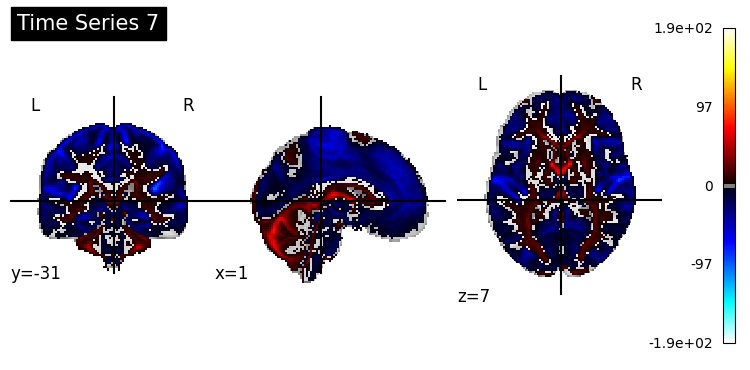

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


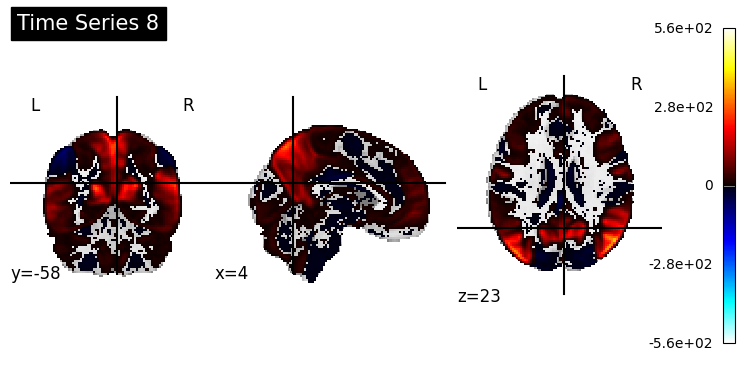

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


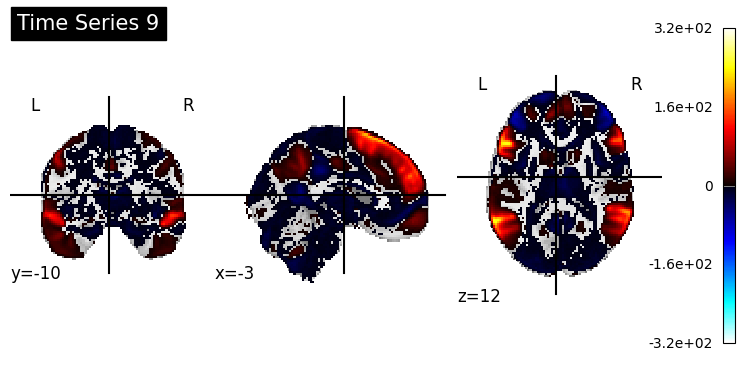

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


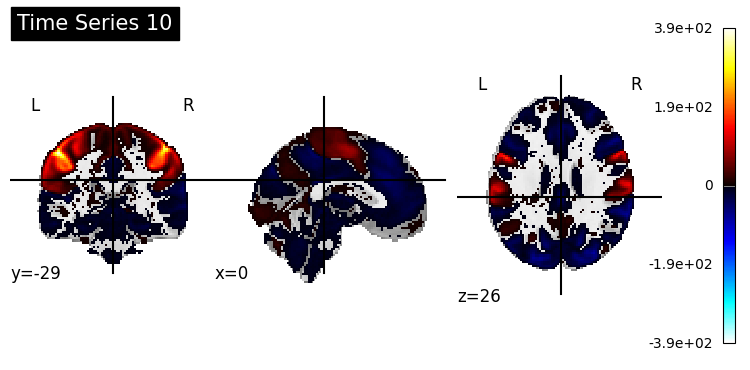

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


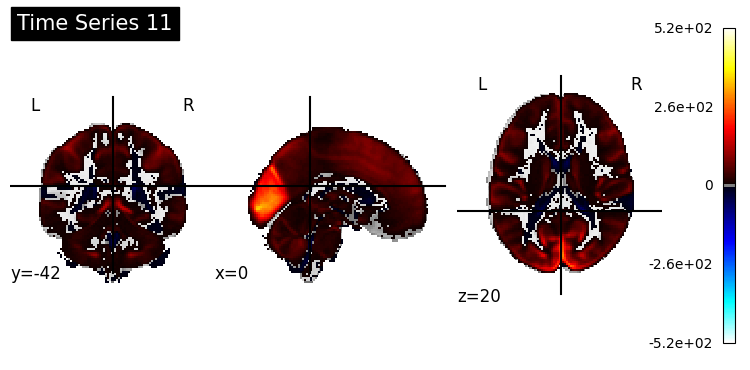

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


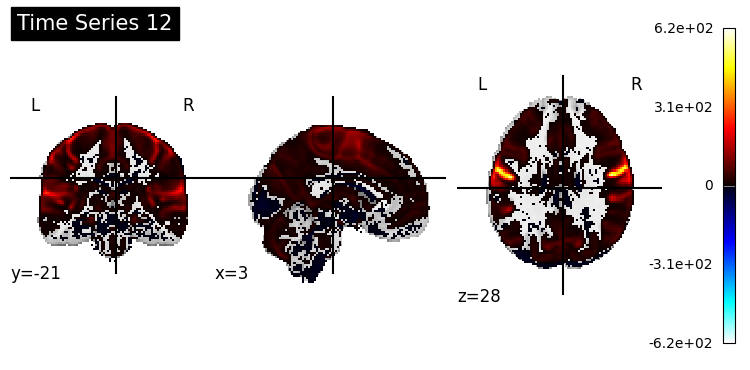

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


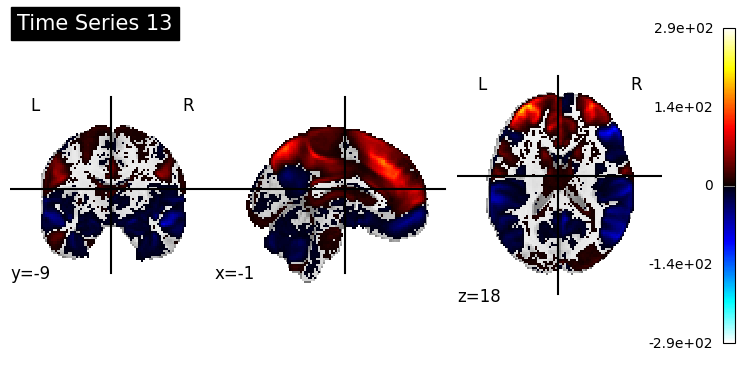

/opt/homebrew/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


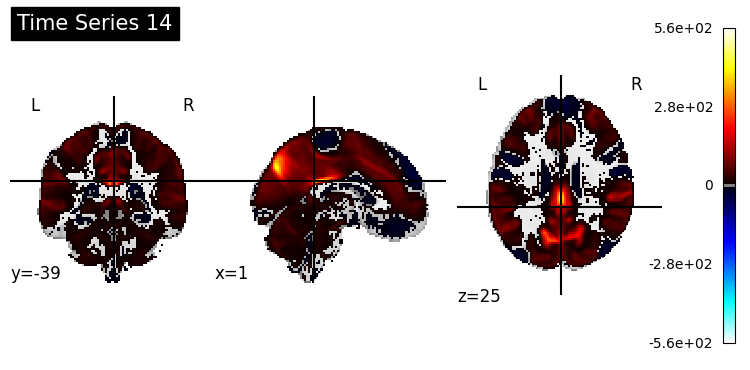

In [11]:
# Plot the brain for every times point
for timeseries in range(0, data.shape[3]):
    one_rsn = image.index_img(img, timeseries)
    plotting.plot_stat_map(one_rsn, title=f'Time Series {timeseries}', threshold = 3)
    plotting.view_img(one_rsn)
    plotting.show()


##### Visualize the Brain Activity of the 10 Most Dynamic Regions Across Time

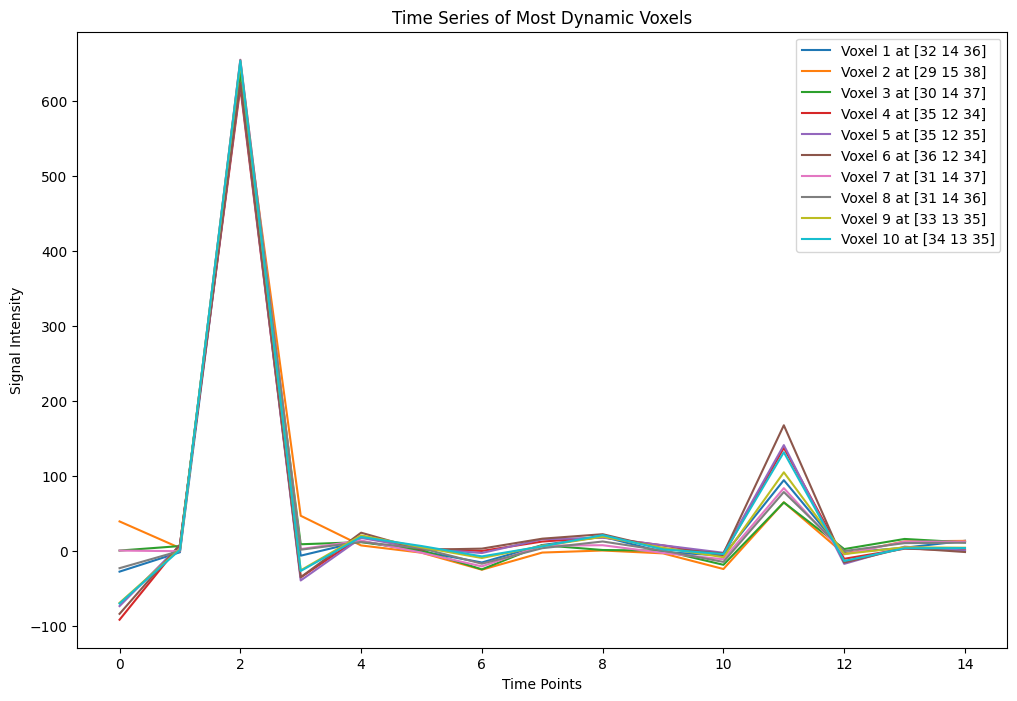

In [12]:
variance_map = np.var(data, axis=3)

# Find the coordinates of the top 10 most dynamic voxels
top_n = 10 
threshold = np.percentile(variance_map, 95)  # Example threshold (95th percentile)
significant_coords = np.argwhere(variance_map > threshold)

# Sort the coordinates by variance and take the top N
significant_indices = np.argsort(variance_map[variance_map > threshold])[-top_n:]

# Get the actual coordinates of these voxels
most_dynamic_coords = significant_coords[significant_indices]

# Step 3: Extract time series for the most dynamic voxels
time_series_list = []
for coord in most_dynamic_coords:
    x, y, z = coord
    time_series = data[x, y, z, :]  # Extract the time series for this voxel
    time_series_list.append(time_series)

# Step 4: Visualize the time series of the most dynamic voxels
plt.figure(figsize=(12, 8))
for i, time_series in enumerate(time_series_list):
    plt.plot(time_series, label=f'Voxel {i+1} at {most_dynamic_coords[i]}')

plt.xlabel('Time Points')
plt.ylabel('Signal Intensity')
plt.title('Time Series of Most Dynamic Voxels')
plt.legend()
plt.show()

### 1. Extracts signal from sphere around DMN seeds

In [13]:
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
    "Posterior Cingulate Cortex",
    "Left Temporoparietal junction",
    "Right Temporoparietal junction",
    "Medial prefrontal cortex",
]

In [14]:
masker = NiftiSpheresMasker(
    dmn_coords,
    radius=8,
    detrend=True,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    low_pass=None,
    high_pass=None,
    t_r=2,
    memory="nilearn_cache",
    memory_level=1,
    verbose=2,
    clean__butterworth__padtype="even",  # kwarg to modify Butterworth filter
)

# Additionally, we pass confound information to ensure our extracted signal is cleaned from confounds.

time_series = masker.fit_transform(img)


________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x119c0b4d0>, <nilearn.maskers.nifti_spheres_masker._ExtractionFunctor object at 0x119cfee90>, { 'allow_overlap': False,
  'clean_kwargs': {'butterworth__padtype': 'even'},
  'detrend': True,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'mask_img': None,
  'radius': 8,
  'reports': True,
  'seeds': [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)],
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  't_r': 2}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=2)
[NiftiSpheresMasker.transform_single_imgs] Loading data from Nifti1Image('data/groupICA/groupICA_3T_HCP1200_MSMAll_d15.ica/melodic_IC_sum.nii.gz')

#### Spheres Summary Report

In [15]:
report = masker.generate_report()
report

#### Time Series


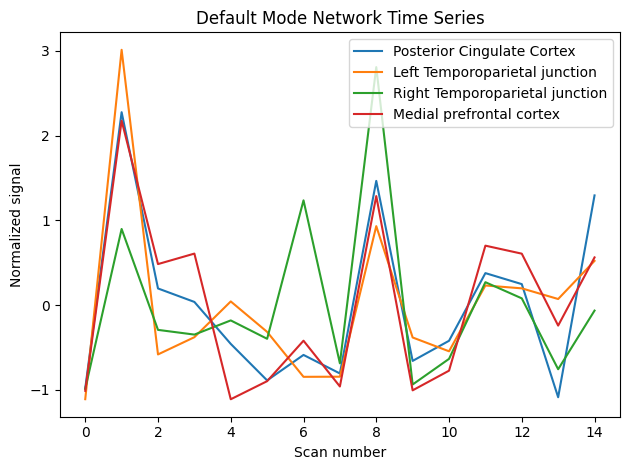

In [16]:
for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)

plt.title("Default Mode Network Time Series")
plt.xlabel("Scan number")
plt.ylabel("Normalized signal")
plt.legend()
plt.tight_layout()

### Compute Partial Correlation Matrix

In [17]:
connectivity_measure = ConnectivityMeasure(
    kind="partial correlation",
    standardize="zscore_sample",
)
partial_correlation_matrix = connectivity_measure.fit_transform([time_series])[0]

#### Connectome

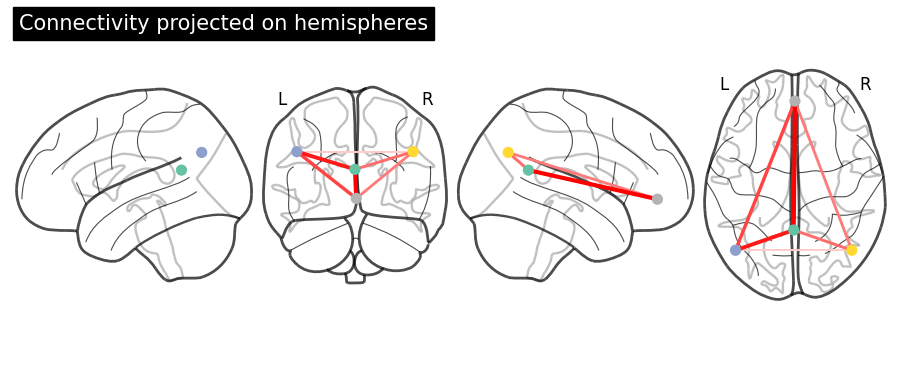

In [18]:
plotting.plot_connectome(
    partial_correlation_matrix,
    dmn_coords,
    title="Connectivity projected on hemispheres",
    display_mode="lyrz",
)

plotting.show()

In [19]:
view = plotting.view_connectome(partial_correlation_matrix, dmn_coords)
view

### 2. Extract signals on spheres from an atlas

In [20]:
power = datasets.fetch_coords_power_2011(legacy_format=False)
power.keys()

dict_keys(['rois', 'description'])

#### Extracting the average fMRI signal from spherical regions

In [21]:
# get the regions coordinates
coords = np.vstack((power.rois["x"], power.rois["y"], power.rois["z"])).T

print(f"Stacked power coordinates in array of shape {coords.shape}.")

Stacked power coordinates in array of shape (264, 3).


In [22]:
# define spheres masker with small enough radius to avoid regions overlap

spheres_masker = NiftiSpheresMasker(
    seeds=coords,
    smoothing_fwhm=6,
    radius=5.0,
    detrend=True,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    low_pass=None,
    high_pass=None,
    t_r=2,
)

timeseries = spheres_masker.fit_transform(img)
timeseries

array([[-1.1118641 , -1.1151234 , -1.3292798 , ..., -1.4027598 ,
        -0.2818441 , -1.347846  ],
       [-0.6046193 , -0.49884626, -0.53117454, ..., -0.5341519 ,
        -0.13716806, -0.2920897 ],
       [ 3.3678122 ,  3.364199  ,  0.321225  , ..., -0.14624585,
        -0.35661528, -0.4338778 ],
       ...,
       [ 0.05576755,  0.10600832,  0.10916957, ...,  0.03308218,
        -1.0951318 , -0.28686336],
       [-0.04098191,  0.05836529, -1.19835   , ..., -0.7004575 ,
        -0.08858462, -0.77344453],
       [ 0.14371502,  0.16861778,  0.2805082 , ...,  0.3354666 ,
        -0.41434878, -0.80432606]], dtype=float32)

In [23]:
# (n_timepoints, n_seeds) where n_seeds is the number of coord, from which we are extracting signals
timeseries.shape

(15, 264)

### Estimate Correlations

In [24]:
covariance_estimator = GraphicalLassoCV(cv=3, verbose=1)
covariance_estimator.fit(timeseries)

[GraphicalLassoCV] Done refinement  1 out of 4:   0s
[GraphicalLassoCV] Done refinement  2 out of 4:   2s
[GraphicalLassoCV] Done refinement  3 out of 4:   4s
[GraphicalLassoCV] Done refinement  4 out of 4:   6s


/opt/homebrew/lib/python3.11/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


GraphicalLassoCV(cv=3, verbose=1)

In [25]:
# get the Region of Interest (ROI) to ROI Covariance Matrix

matrix = covariance_estimator.covariance_
print(f"Covariance matrix has shape {matrix.shape}.")

Covariance matrix has shape (264, 264).


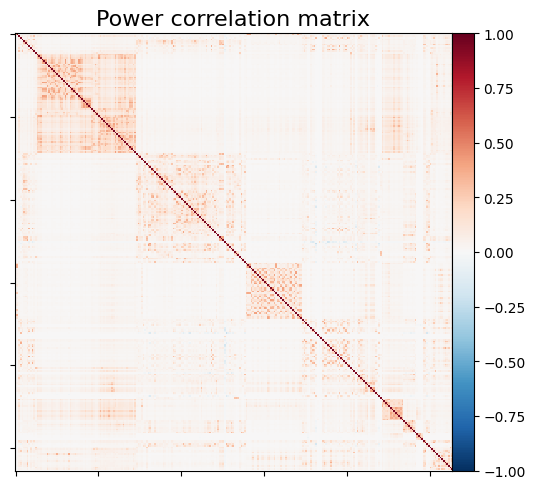

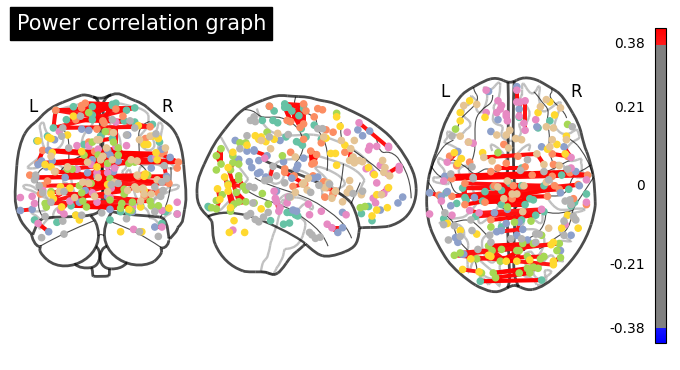

In [26]:
# plot the matrix and correlation graph
plotting.plot_matrix(
    matrix,
    vmin=-1.0,
    vmax=1.0,
    colorbar=True,
    title="Power correlation matrix",
)

# keep only the strongest connections.
plotting.plot_connectome(
    matrix,
    coords,
    title="Power correlation graph",
    edge_threshold="99.8%",
    node_size=20,
    colorbar=True,
)

visualize edge strength from the correlation graph

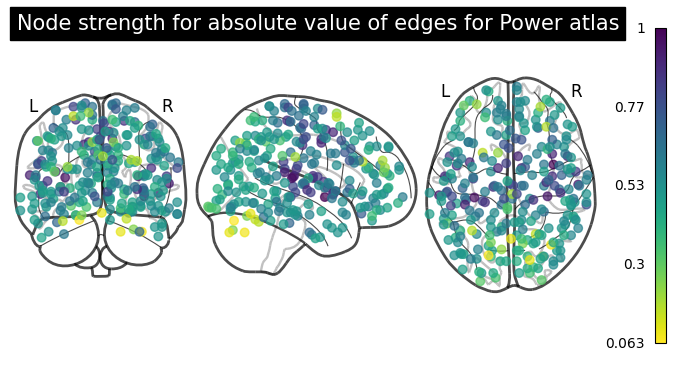

In [27]:
# calculate normalized, absolute strength for each node
node_strength = np.sum(np.abs(matrix), axis=0)
node_strength /= np.max(node_strength)

plotting.plot_markers(
    node_strength,
    coords,
    title="Node strength for absolute value of edges for Power atlas",
)

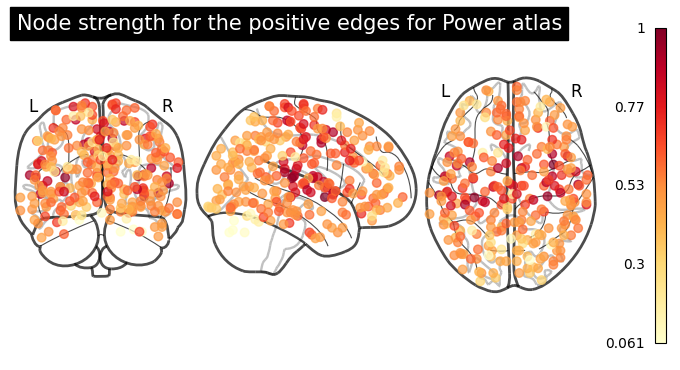

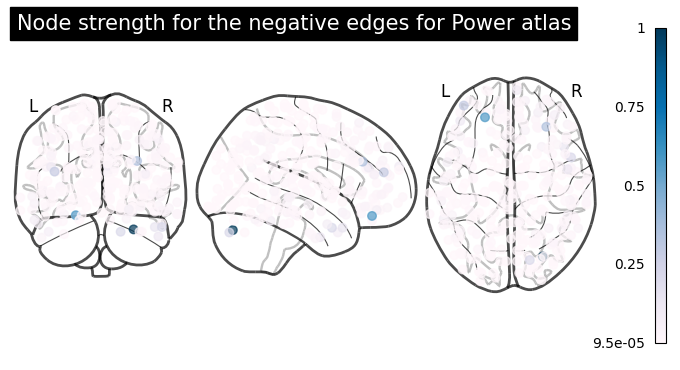

In [28]:
# plot positive and negative strengths
from matplotlib.pyplot import cm

# clip connectivity matrix to preserve positive and negative edges
positive_edges = np.clip(matrix, 0, matrix.max())
negative_edges = np.clip(matrix, matrix.min(), 0)

# calculate strength for positive edges
node_strength_positive = np.sum(np.abs(positive_edges), axis=0)
node_strength_positive /= np.max(node_strength_positive)

# calculate strength for negative edges
node_strength_negative = np.sum(np.abs(negative_edges), axis=0)
node_strength_negative /= np.max(node_strength_negative)

# plot nodes' strength for positive edges
plotting.plot_markers(
    node_strength_positive,
    coords,
    title="Node strength for the positive edges for Power atlas",
    node_cmap=cm.YlOrRd,
)

# plot nodes' strength for negative edges
plotting.plot_markers(
    node_strength_negative,
    coords,
    title="Node strength for the negative edges for Power atlas",
    node_cmap=cm.PuBu,
)

### 3. Extract Signals on Spheres from Dosenbach's Altas

In [29]:
dosenbach = datasets.fetch_coords_dosenbach_2010(legacy_format=False)

coords = np.vstack(
    (
        dosenbach.rois["x"],
        dosenbach.rois["y"],
        dosenbach.rois["z"],
    )
).T

spheres_masker = NiftiSpheresMasker(
    seeds=coords,
    smoothing_fwhm=6,
    radius=4.5,
    detrend=True,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    low_pass=None,
    high_pass=None,
    t_r=2,
)

timeseries = spheres_masker.fit_transform(img)

covariance_estimator =  GraphicalLassoCV(cv=3, verbose=1)

try:
    covariance_estimator.fit(timeseries)
    matrix = covariance_estimator.covariance_
except FloatingPointError as e:
    print(f"Error encountered: {e}")
    # Handle the error appropriately


[GraphicalLassoCV] Done refinement  1 out of 4:   0s
[GraphicalLassoCV] Done refinement  2 out of 4:   1s
[GraphicalLassoCV] Done refinement  3 out of 4:   2s
[GraphicalLassoCV] Done refinement  4 out of 4:   2s


/opt/homebrew/lib/python3.11/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


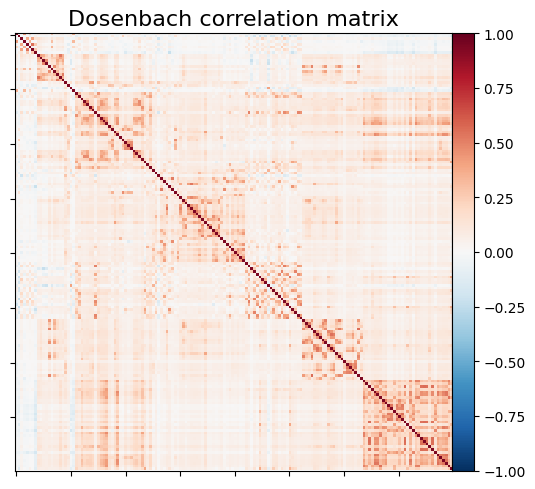

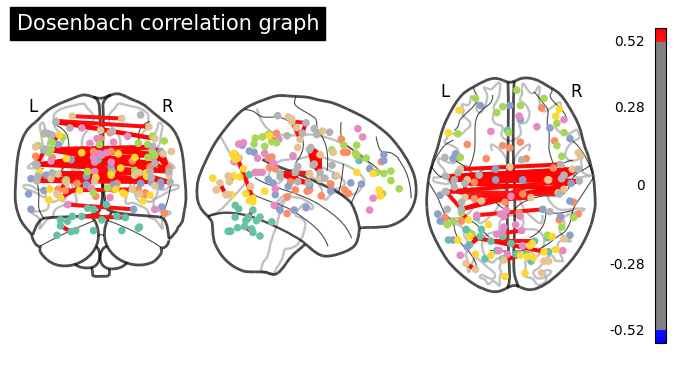

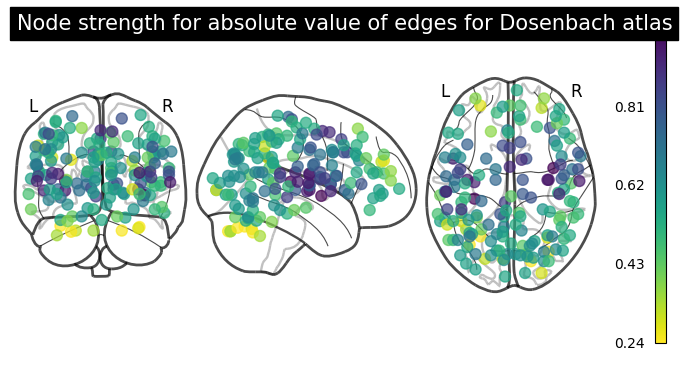

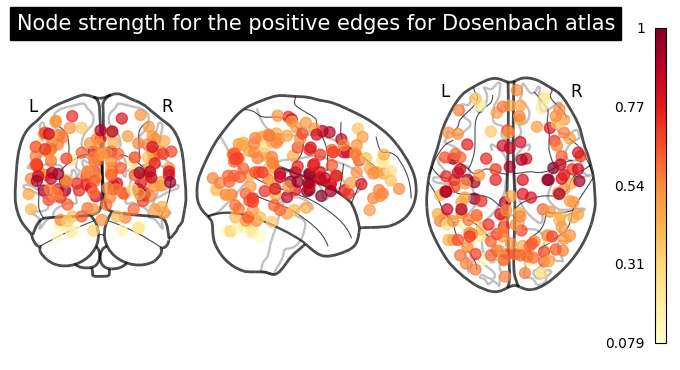

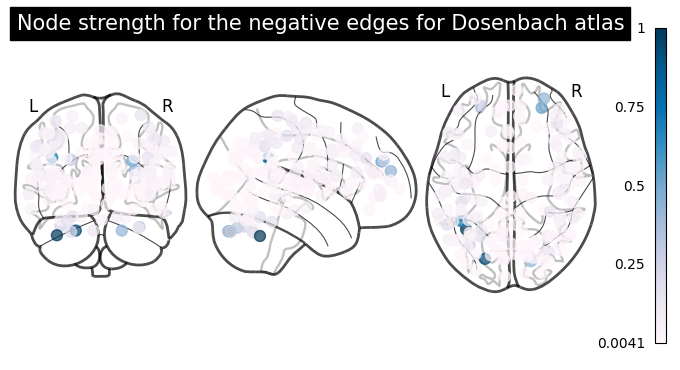

In [30]:
plotting.plot_matrix(
    matrix,
    vmin=-1.0,
    vmax=1.0,
    colorbar=True,
    title="Dosenbach correlation matrix",
)

plotting.plot_connectome(
    matrix,
    coords,
    title="Dosenbach correlation graph",
    edge_threshold="99.7%",
    node_size=20,
    colorbar=True,
)


# calculate average strength for each node
node_strength = np.sum(np.abs(matrix), axis=0)
node_strength /= np.max(node_strength)

plotting.plot_markers(
    node_strength,
    coords,
    title="Node strength for absolute value of edges for Dosenbach atlas",
)

# clip connectivity matrix to preserve positive and negative edges
positive_edges = np.clip(matrix, 0, matrix.max())
negative_edges = np.clip(matrix, matrix.min(), 0)

# calculate strength for positive and edges
node_strength_positive = np.sum(np.abs(positive_edges), axis=0)
node_strength_positive /= np.max(node_strength_positive)
node_strength_negative = np.sum(np.abs(negative_edges), axis=0)
node_strength_negative /= np.max(node_strength_negative)

# plot nodes' strength for positive edges
plotting.plot_markers(
    node_strength_positive,
    coords,
    title="Node strength for the positive edges for Dosenbach atlas",
    node_cmap=cm.YlOrRd,
)

# plot nodes' strength for negative edges
plotting.plot_markers(
    node_strength_negative,
    coords,
    title="Node strength for the negative edges for Dosenbach atlas",
    node_cmap=cm.PuBu,
)